# Vaccine Shot Prediction by Thiyaneshwaran Nagarajan

## To predict whether people got H1N1 and seasonal flu vaccines using information 

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the features

In [2]:
pd.set_option('max_columns', None)
data_features=pd.read_csv('features.csv')
print(data_features.shape)
data_features.head(10)

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


#### Check for null values in "data_features" dataframe

In [3]:
data_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

# Reading the Labels

In [4]:
data_labels=pd.read_csv('labels.csv')

print(data_labels.shape)
data_labels.head()

(26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


#### Check for null values in "data_labels" dataframe

In [5]:
data_labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

#### Apending the "data_labels" dataframe features into "data_features" dataframe

In [6]:
data_features['h1n1_vaccine']=data_labels['h1n1_vaccine']
data_features['seasonal_vaccine']=data_labels['seasonal_vaccine']
print(data_features.shape)
data_features.head()

(26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Exploratory Data Analysis

## 1. Features in "data_features" dataframe

In [7]:
data_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

## 2. Categorical Features

In [8]:
features_cate=['age_group','education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status','census_msa']

### 2.1 Categorical Features vs H1N1 vaccine count plot

In [9]:
def plot_cat(feature,hue):
    a=0
    b=0
    c=0
    for i, features in enumerate(feature):
        if i<=2:
            sns.countplot(data=data_features,x=features, hue=hue,ax=ax[0,a])
            ax[0,a].set_xlabel(features,fontsize=15)
            ax[0,a].set_ylabel("Count",fontsize=15)
            a+=1
        elif i>2 and i<=5:
            sns.countplot(data=data_features,x=features, hue=hue,ax=ax[1,b])
            ax[1,b].set_xlabel(features,fontsize=15)
            ax[1,b].set_ylabel("Count",fontsize=15)
            b+=1
        elif i>5:
            sns.countplot(data=data_features,x=features, hue=hue,ax=ax[2,c])
            ax[2,c].set_xlabel(features,fontsize=15)
            ax[2,c].set_ylabel("Count",fontsize=15)
            c+=1
    a=0
    b=0
    c=0

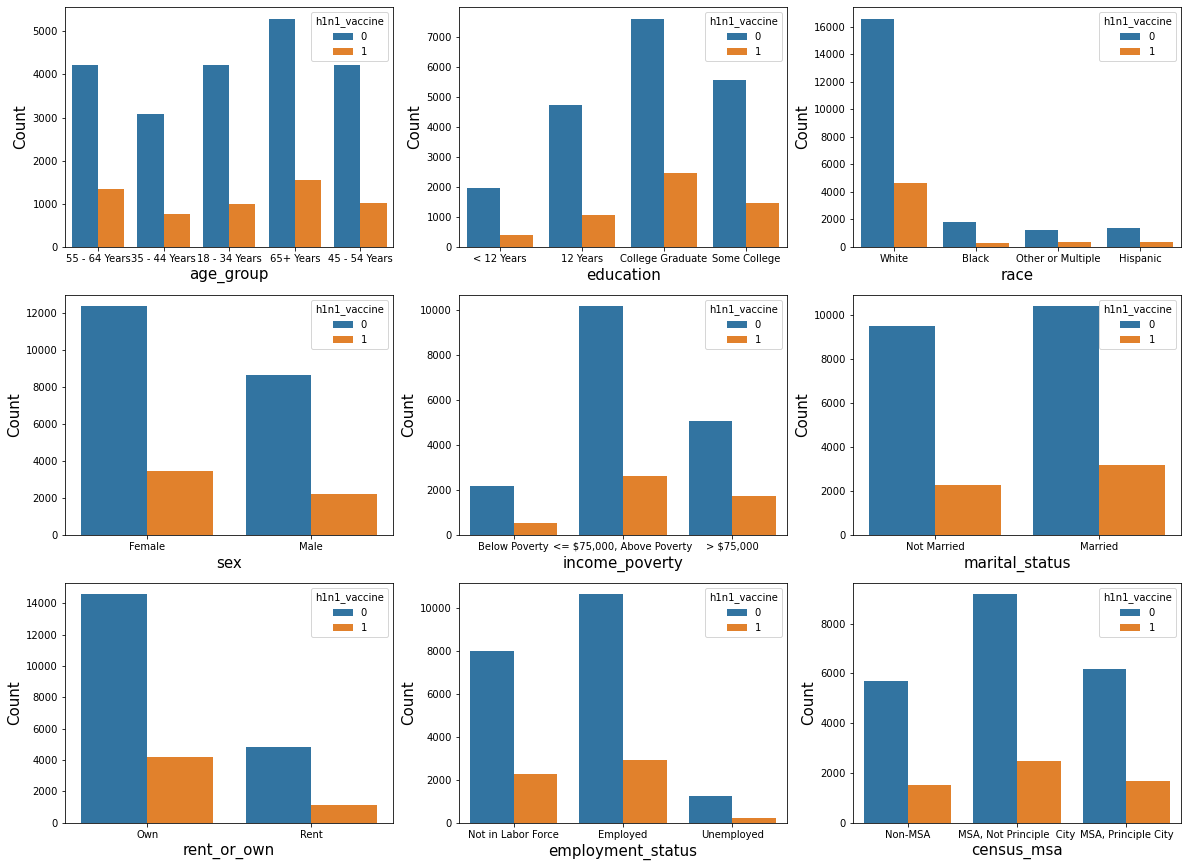

In [10]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_cate,hue="h1n1_vaccine")

### 2.2 Categorical Features vs Seasonal vaccine count plot

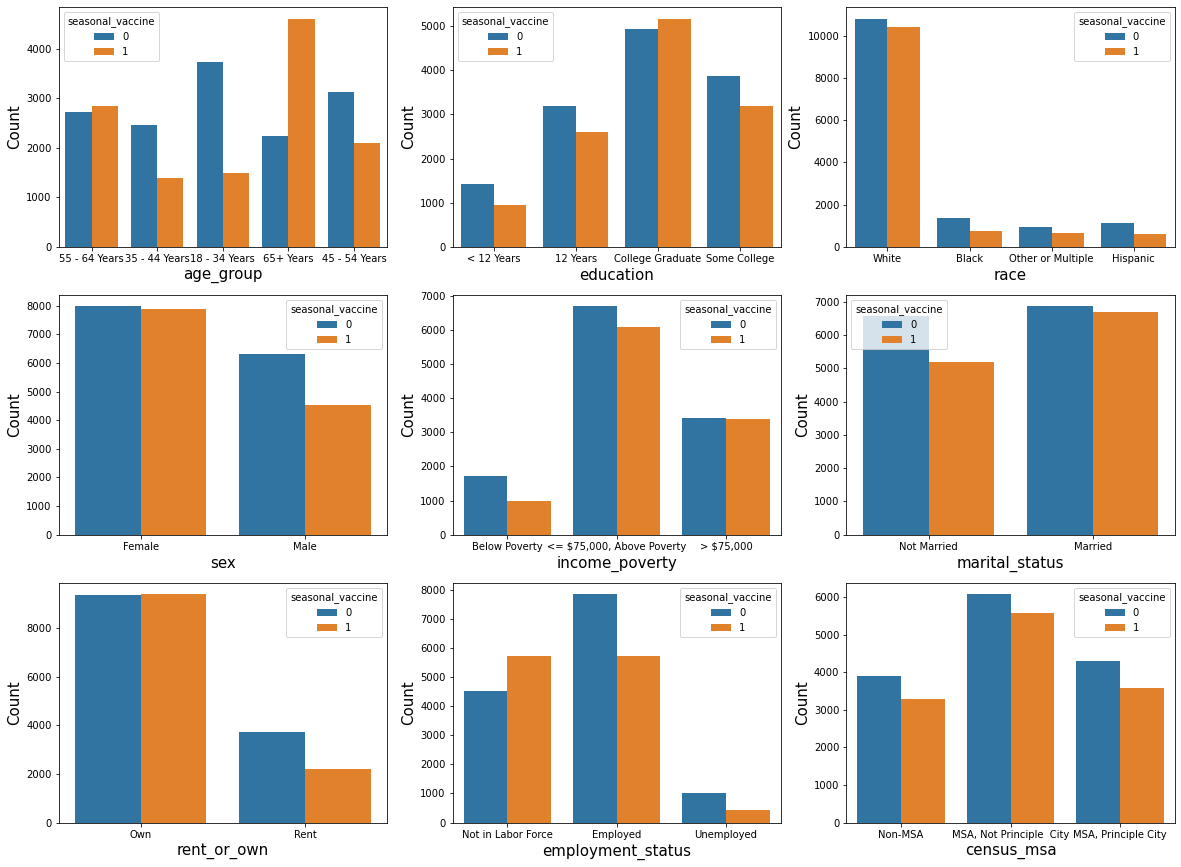

In [11]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_cate,hue="seasonal_vaccine")

## 3. Encoded Features

### 3.1 Encoded Features 1

In [12]:
features_num1=['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face']

#### 3.1.1 Encoded Features 1 vs H1N1 Vaccine plot

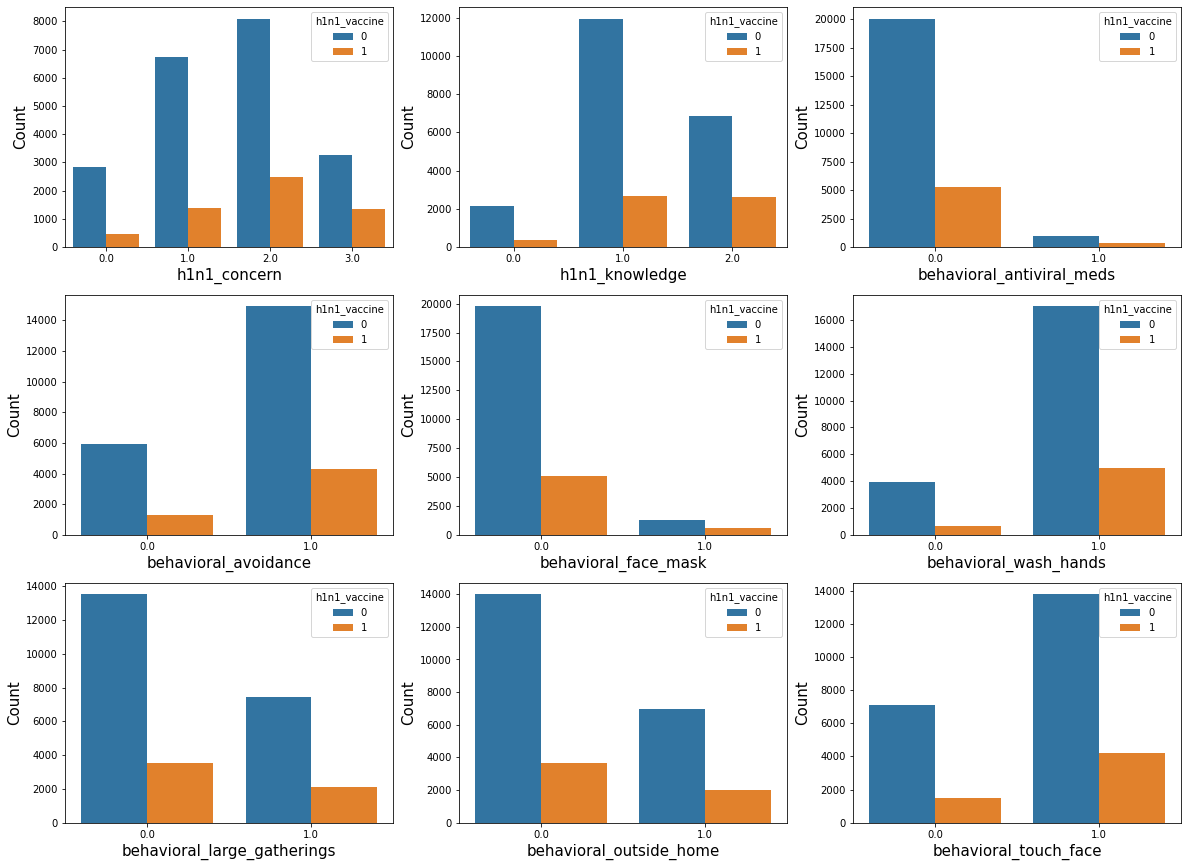

In [13]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num1,hue="h1n1_vaccine")

#### 3.1.2 Encoded Features 1 vs Seasonal Flu Vaccine plot

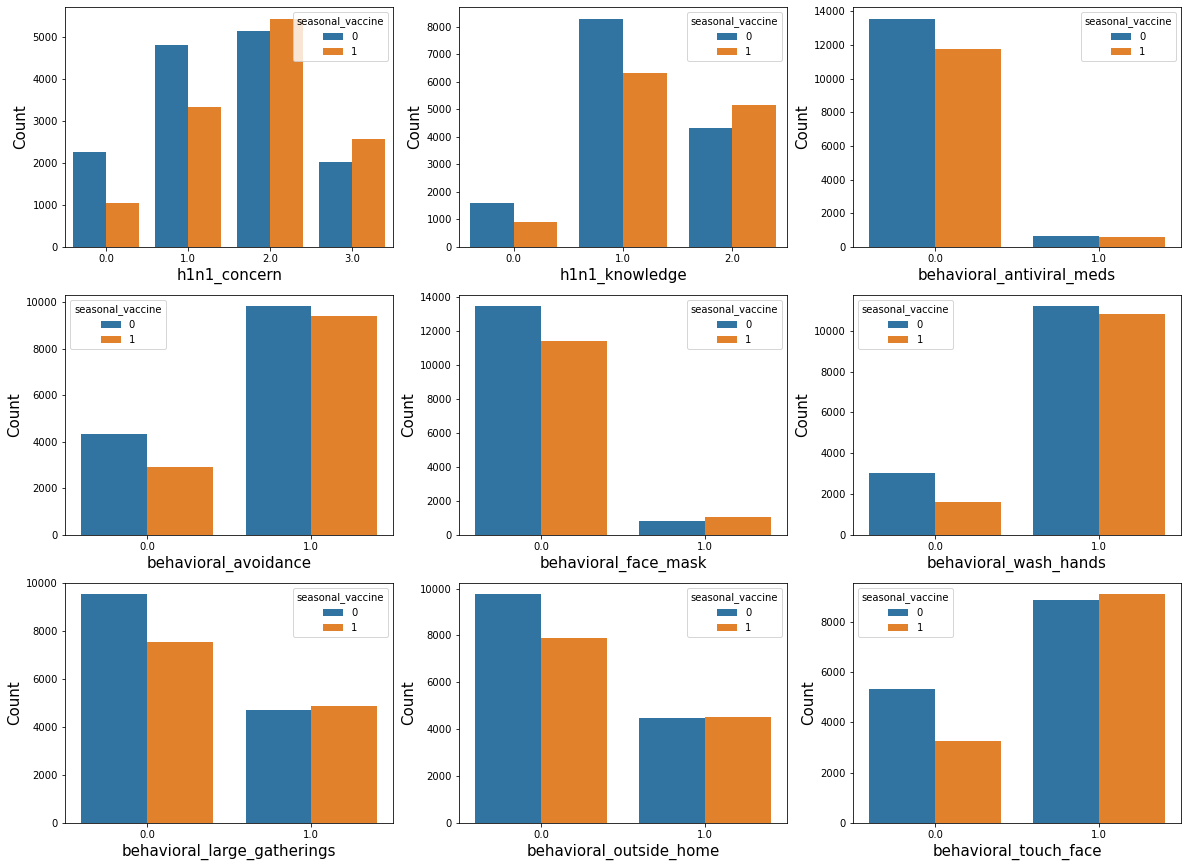

In [14]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num1,hue="seasonal_vaccine")

## 3.2 Numerical Features 2

In [15]:
features_num2=['doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance','household_adults', 'household_children']

### 3.2.1 Encoded Features 2 vs H1N1 Vaccine plot

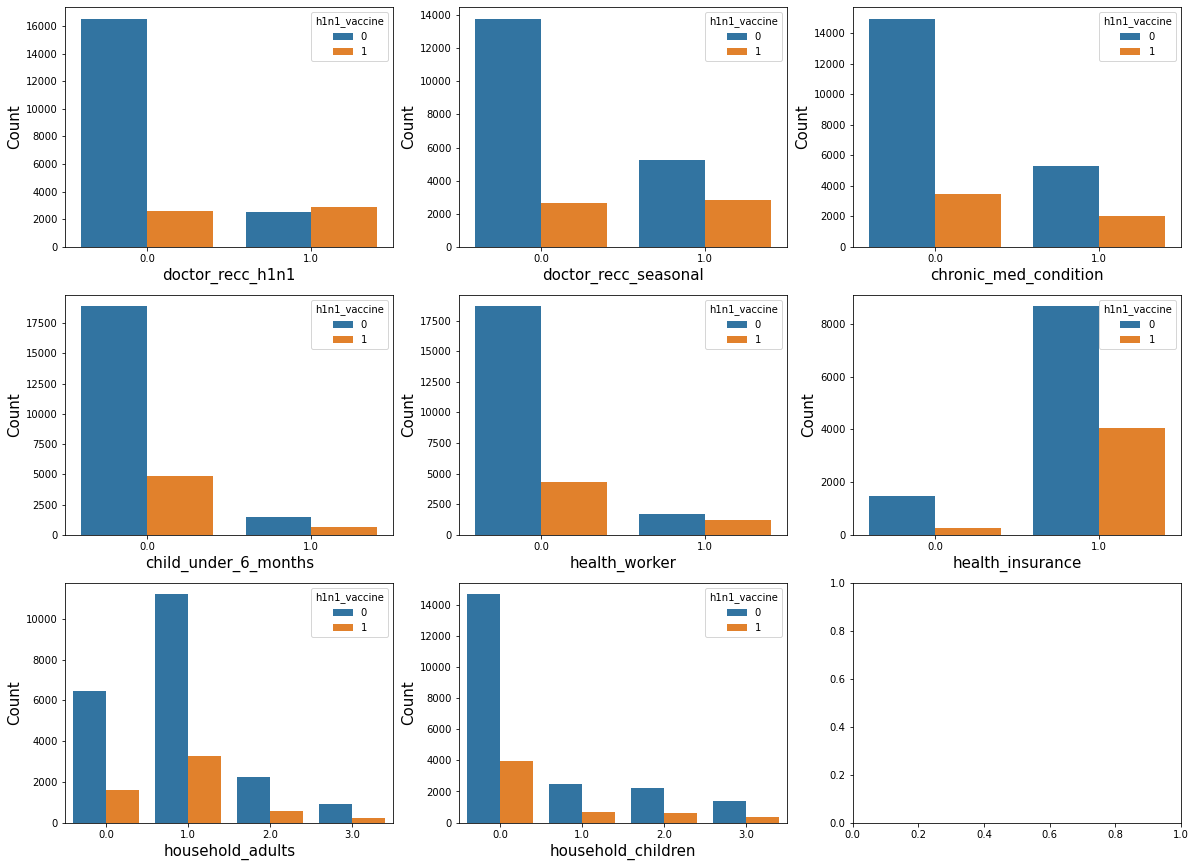

In [16]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num2,hue="h1n1_vaccine")

### 3.2.2 Encoded Features 2 vs Seasonal Flu Vaccine plot

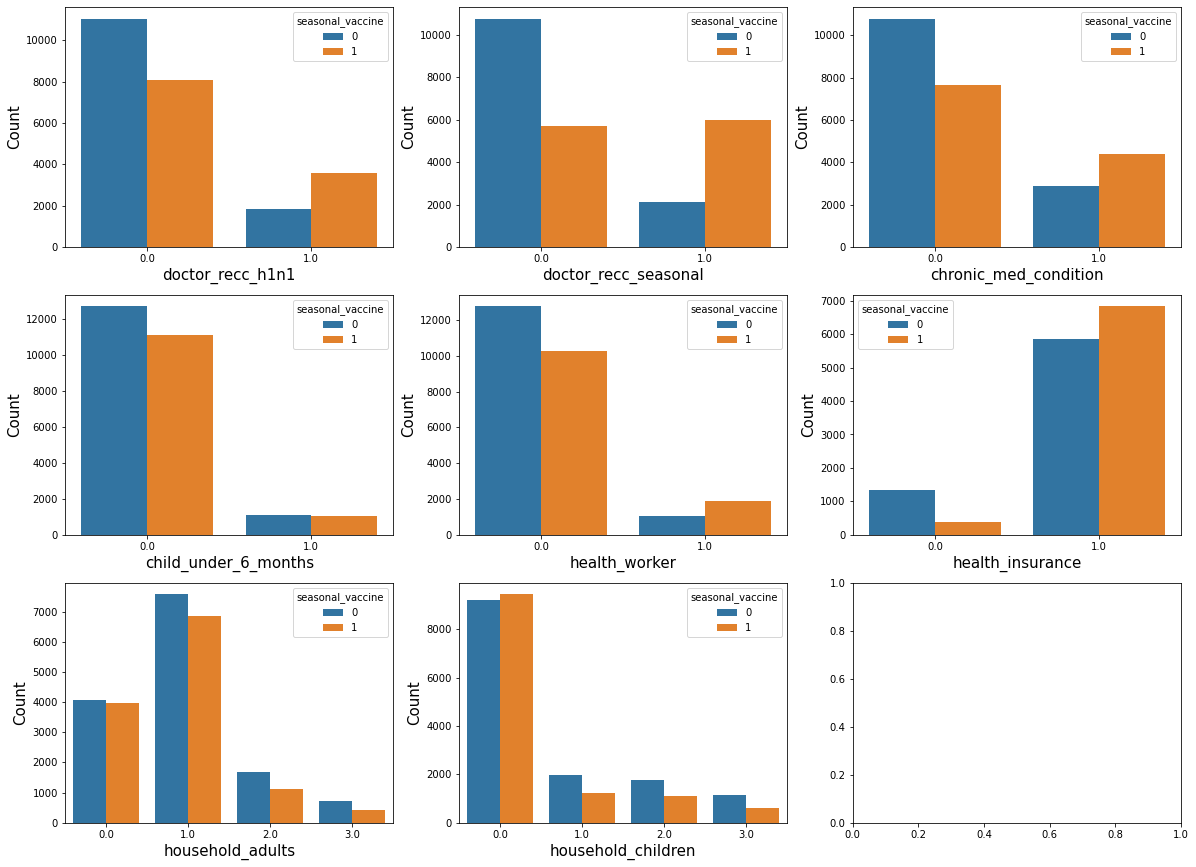

In [17]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num2,hue="seasonal_vaccine")

## 3.3 Encoded Features 3

In [18]:
features_num3=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

### 3.3.1 Encoded Features 3 vs H1N1 Vaccine plot

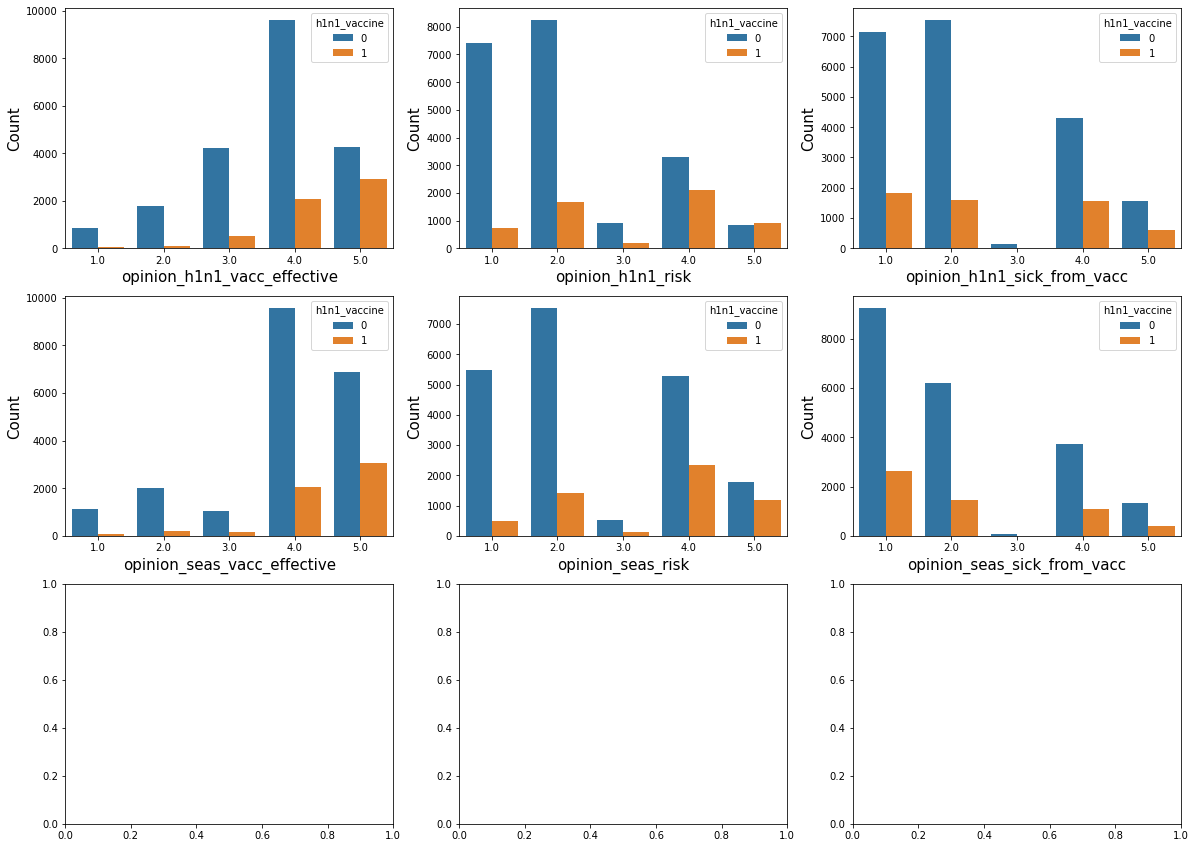

In [19]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num3,hue="h1n1_vaccine")

### 3.3.2 Encoded Features 3 vs Seasonal Flu Vaccine plot

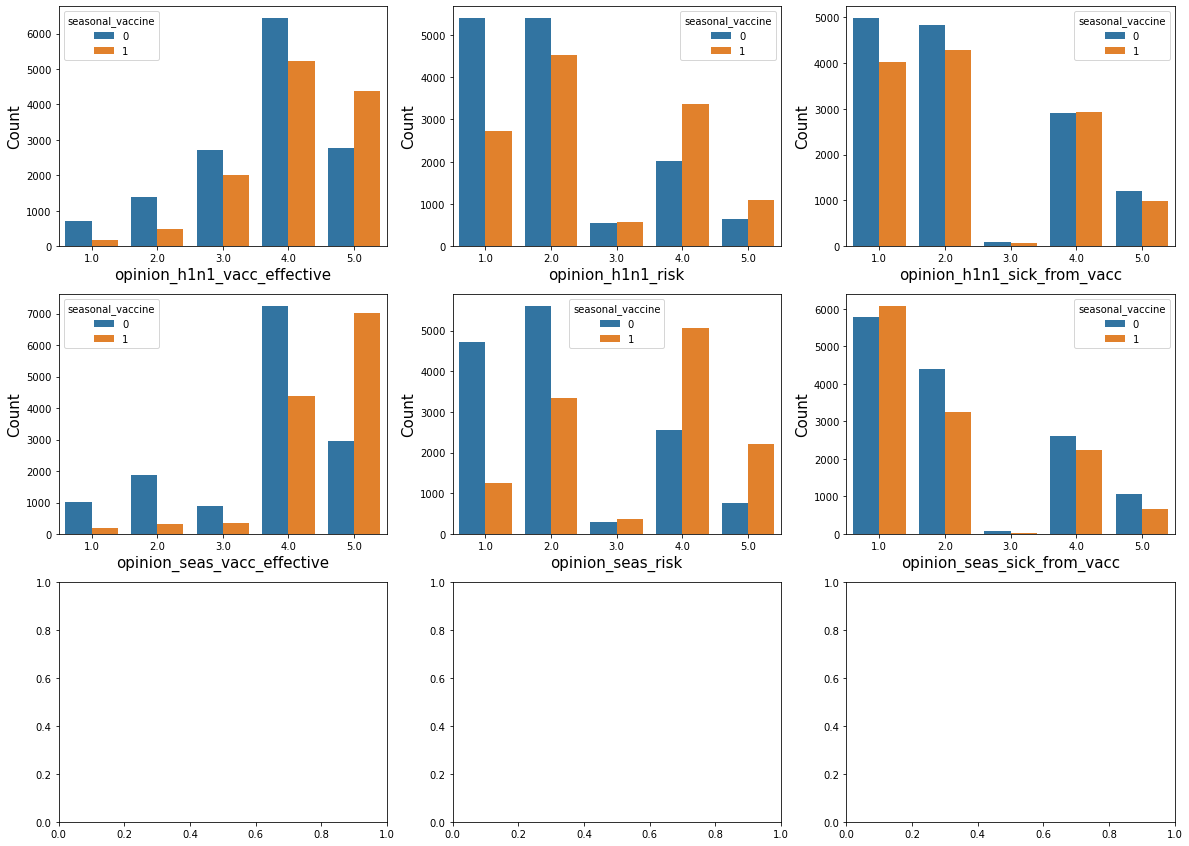

In [20]:
fig,ax = plt.subplots(3,3,figsize=(20,15))
plot_cat(features_num3,hue="seasonal_vaccine")

#### Creating new "data_new" dataframe by copying "data_features" dataframe

In [21]:
data_new=data_features.copy(deep=True)
print(data_new.shape)
data_new.head()

(26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


#### Dropping unnecessary columns in "data_new" dataframe

In [22]:
drop_columns=['respondent_id','hhs_geo_region','health_insurance','employment_industry','employment_occupation']
for columns in drop_columns:
    data_new.drop(columns, axis=1,inplace=True)

In [23]:
print(data_new.shape)
data_new.head()

(26707, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


#### Checking null values in "data_new" dataframe

In [24]:
data_new.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status           

# Imputing "nan" logically

#### Creating new "data" dataframe by copying "data_new" dataframe

In [25]:
data=data_new.copy(deep=True)
print(data.shape)
data.head()

(26707, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


#### Function for imputing features of "data" dataframe

In [26]:
def impute_feat(column,which_vaccine):
    for i in np.arange (0,26707):
        if np.isnan(data[column][i]) and data[which_vaccine][i]==0:
            data[column].replace(to_replace=data[column][i],value=np.min(data_new[column]),inplace=True)
        elif np.isnan(data[column][i]) and data[which_vaccine][i]==1:
            data[column].replace(to_replace=data[column][i],value=np.max(data_new[column]),inplace=True)

In [27]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

#### Features logically connected to "h1n1_vaccine" that are to be imputed using the above function

In [28]:
h1n1_feat=['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1','chronic_med_condition', 'child_under_6_months', 'health_worker',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk']

#### Calling the "impute_feat" function to impute the "h1n1_feat" features

In [29]:
for features in h1n1_feat:
    impute_feat(features,'h1n1_vaccine')

#### Features logically connected to "seasonal_vaccine" that are to be imputed using the  "impute_feat"  function

In [30]:
seasonal_feat=['doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk']

#### Calling the "impute_feat" function to impute the "seasonal_feat" features

In [31]:
for features in seasonal_feat:
    impute_feat(features,'seasonal_vaccine')

#### Imputing "sick_from_vaccine" features

In [32]:
sick_h1n1_vaccine='opinion_h1n1_sick_from_vacc'
sick_seasonal_vaccine='opinion_seas_sick_from_vacc'

#### Function for imputing "sick_from_vaccine" features

In [33]:
def impute_sick_from_vaccine(column,which_vaccine):
    for i in np.arange (0,26707):
        if np.isnan(data[column][i]) and data[which_vaccine][i]==0:
            data[column].replace(to_replace=data[column][i],value=np.max(data_new[column]),inplace=True)
        elif np.isnan(data[column][i]) and data[which_vaccine][i]==1:
            data[column].replace(to_replace=data[column][i],value=np.min(data_new[column]),inplace=True)

#### Calling the above function

In [34]:
impute_sick_from_vaccine(sick_h1n1_vaccine,'h1n1_vaccine')
impute_sick_from_vaccine(sick_seasonal_vaccine,'seasonal_vaccine')

#### Function for imputing categorical features

In [35]:
def impute_cat_feat(column,which_vaccine,value1,value2):
    for i in np.arange (0,26707):
        if pd.isnull(data[column][i]) and data[which_vaccine][i]==0:
            data[column].replace(to_replace=data[column][i],value=value1,inplace=True)
        elif pd.isnull(data[column][i]) and data[which_vaccine][i]==1:
            data[column].replace(to_replace=data[column][i],value=value2,inplace=True)

#### Calling the above function to impute categorical features

In [36]:
impute_cat_feat('education','h1n1_vaccine','< 12 Years','College Graduate')

In [37]:
impute_cat_feat('income_poverty','h1n1_vaccine','Below Poverty','> $75,000')

In [38]:
impute_cat_feat('marital_status','h1n1_vaccine','Not Married','Married')

In [39]:
impute_cat_feat('rent_or_own','h1n1_vaccine','Rent','Own')

#### Function for imputing "employment_status" feature

In [40]:
def impute_emp_status(column,which_vaccine,value1,value2,value3):
    for i in np.arange (0,26707):
        if pd.isnull(data[column][i]) and data[which_vaccine][i]==0:
            data[column].replace(to_replace=data[column][i],value=value1,inplace=True)
        elif pd.isnull(data[column][i]) and data[which_vaccine][i]==1:
            if data.age_group[i]=='65+ Years':
                data[column].replace(to_replace=data[column][i],value=value2,inplace=True)
            elif data.age_group[i]=='35 - 44 Years':
                data[column].replace(to_replace=data[column][i],value=value3,inplace=True)

#### Calling the above function to impute "employment_status" feature

In [41]:
impute_emp_status('employment_status','h1n1_vaccine',value1='Unemployed',value2='Not in Labor Force',value3='Employed')

#### Checking for null values in "data" dataframe

In [42]:
data.isnull().sum()

h1n1_concern                     0
h1n1_knowledge                   0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_h1n1                 0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_h1n1_vacc_effective      0
opinion_h1n1_risk                0
opinion_h1n1_sick_from_vacc      0
opinion_seas_vacc_effective      0
opinion_seas_risk                0
opinion_seas_sick_from_vacc      0
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status                0
census_msa          

Only "household_adults" and "household_children" features has null values

#### Dropping the rows containg the null values

In [43]:
data=data.dropna()
data = data.reset_index(drop=True)

#### "data" dataframe after imputing

In [44]:
print(data.shape)
data.head()

(26458, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


# Label Encoding

## Encoding the Categorical Features

### Uniques values in Categorical Features

In [45]:
for nfeature in features_cate:
    print("Unique Values in", f'\"{nfeature}\"',"feature is")
    print(data[nfeature].unique())
    print("\n")

Unique Values in "age_group" feature is
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


Unique Values in "education" feature is
['< 12 Years' '12 Years' 'College Graduate' 'Some College']


Unique Values in "race" feature is
['White' 'Black' 'Other or Multiple' 'Hispanic']


Unique Values in "sex" feature is
['Female' 'Male']


Unique Values in "income_poverty" feature is
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']


Unique Values in "marital_status" feature is
['Not Married' 'Married']


Unique Values in "rent_or_own" feature is
['Own' 'Rent']


Unique Values in "employment_status" feature is
['Not in Labor Force' 'Employed' 'Unemployed']


Unique Values in "census_msa" feature is
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']




#### Categorical Columns to be label encoded

In [46]:
cat_features=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']

#### Encoding categorical features

In [47]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for feature in cat_features:
    data.loc[:,[feature]]=enc.fit_transform(data[feature])

#### Encoding "features_num3" to start from "0"

In [48]:
for feature in features_num3:
    data.loc[:,[feature]]=enc.fit_transform(data[feature])

In [49]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1.0,0.0,0,0


#### Changing the data type of features to "int"

In [50]:
for features in data.columns:
    data[features]=data[features].astype(int)

In [51]:
print(data.shape)
data.head()

(26458, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0


# Correlation

In [52]:
data.corrwith(data_labels.h1n1_vaccine,method='spearman')

h1n1_concern                  -0.004765
h1n1_knowledge                -0.007878
behavioral_antiviral_meds      0.002231
behavioral_avoidance          -0.005080
behavioral_face_mask          -0.007083
behavioral_wash_hands         -0.010120
behavioral_large_gatherings   -0.006639
behavioral_outside_home       -0.009770
behavioral_touch_face         -0.006477
doctor_recc_h1n1              -0.006072
doctor_recc_seasonal          -0.004785
chronic_med_condition         -0.011217
child_under_6_months           0.010003
health_worker                 -0.004832
opinion_h1n1_vacc_effective   -0.007251
opinion_h1n1_risk             -0.005057
opinion_h1n1_sick_from_vacc   -0.014709
opinion_seas_vacc_effective    0.003668
opinion_seas_risk             -0.006323
opinion_seas_sick_from_vacc   -0.004593
age_group                      0.001235
education                      0.012395
race                           0.000034
sex                           -0.005038
income_poverty                -0.005670


In [53]:
data.corrwith(data_labels.seasonal_vaccine, method='spearman')

h1n1_concern                  -0.014267
h1n1_knowledge                -0.004075
behavioral_antiviral_meds      0.001345
behavioral_avoidance          -0.003252
behavioral_face_mask           0.000212
behavioral_wash_hands         -0.004331
behavioral_large_gatherings    0.000285
behavioral_outside_home       -0.006424
behavioral_touch_face         -0.004076
doctor_recc_h1n1               0.000427
doctor_recc_seasonal           0.002240
chronic_med_condition         -0.001995
child_under_6_months          -0.001314
health_worker                 -0.001046
opinion_h1n1_vacc_effective   -0.001664
opinion_h1n1_risk             -0.010721
opinion_h1n1_sick_from_vacc   -0.019087
opinion_seas_vacc_effective    0.000290
opinion_seas_risk             -0.014565
opinion_seas_sick_from_vacc   -0.003237
age_group                      0.000177
education                     -0.004329
race                           0.009029
sex                           -0.009667
income_poverty                -0.006260


<AxesSubplot:>

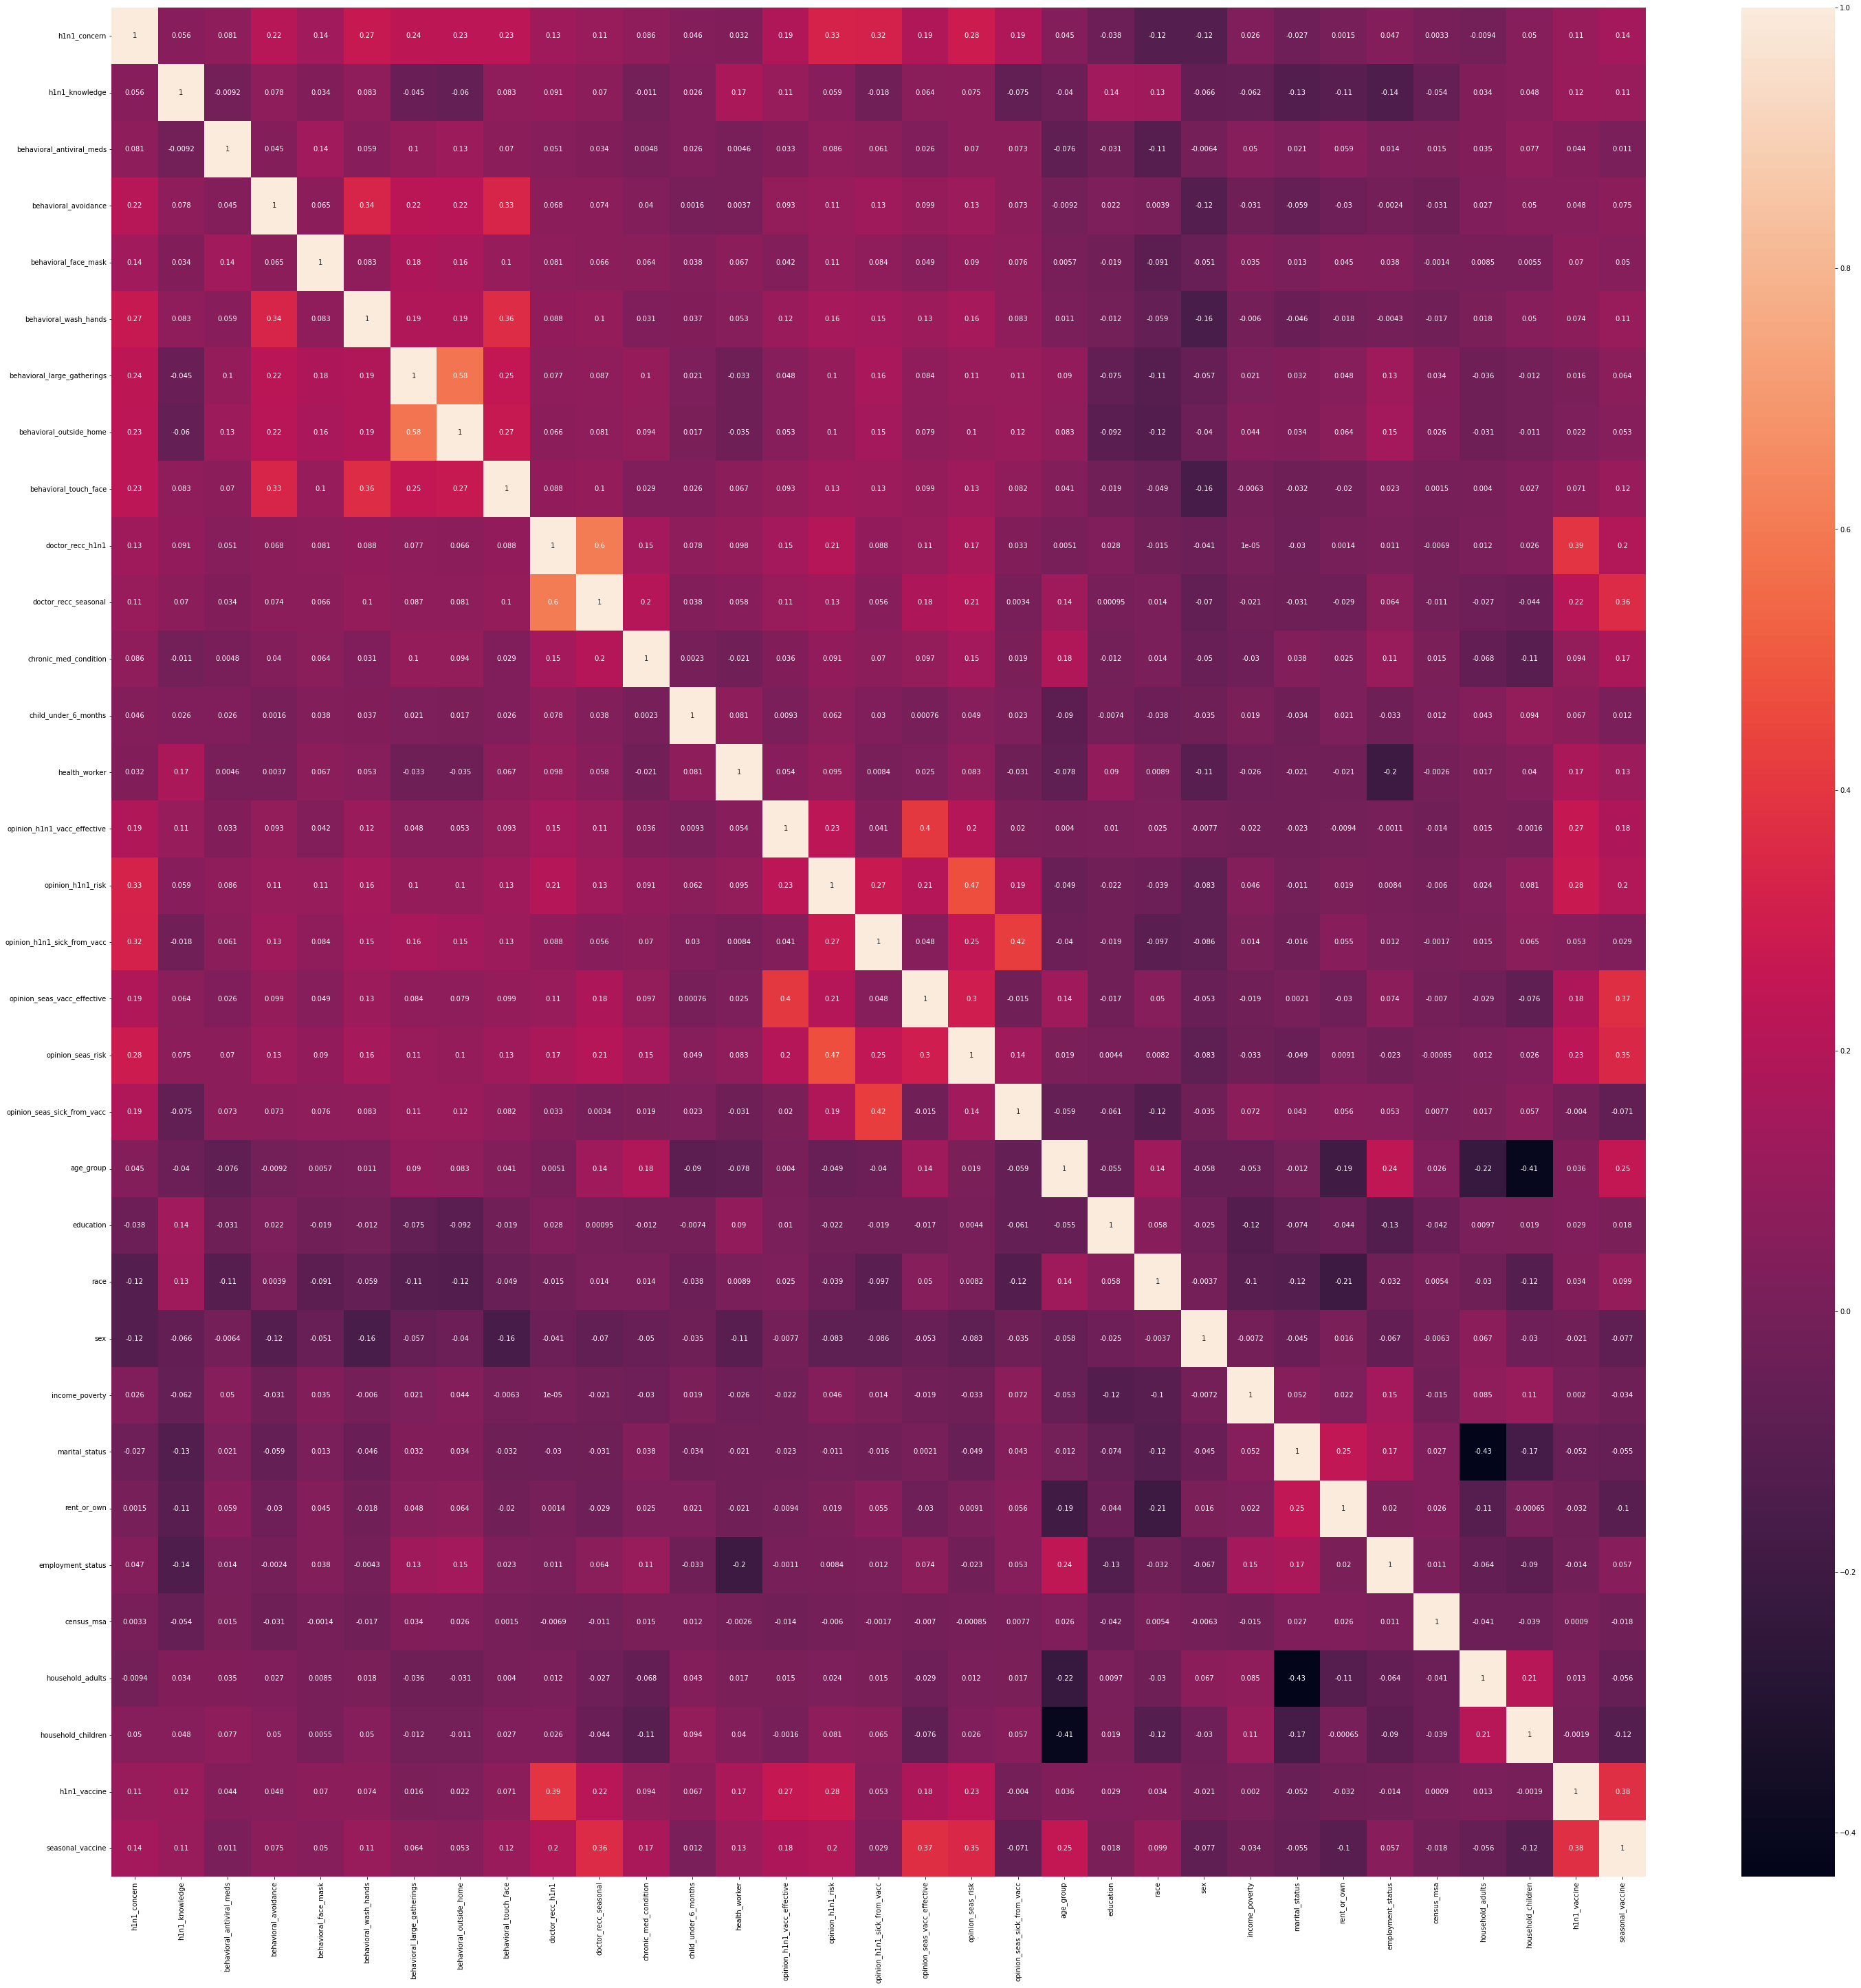

In [54]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(method='kendall'),annot=True)

# Checking for balanced data

### Creating a new target feature "multi_label"
#### "multi_label" combines both the target labels "h1n1_vaccine" and "data.seasonal_vaccine"

In [55]:
multi_label=[]
for i in np.arange(0,26458):
    multi_label.append((data.h1n1_vaccine[i],data.seasonal_vaccine[i]))

### Adding the new target feature "multi_label" into "data" dataframe

In [56]:
data['multi_label']=multi_label

### Now assigning classes for each unique class in "multi_label" target feature 
### unique classes in "multi_label" feature are
#### (0,0) assigned with 0
#### (0,1) assigned with 1
#### (1,0) assigned with 2
#### (1,1) assigned with 3

In [57]:
label_class=[]
for index, value in data.multi_label.items():
    if value == (0,0):
        label_class.append(0)
    elif value == (0,1):
        label_class.append(1)
    elif value == (1,0):
        label_class.append(2)
    elif value == (1,1):
        label_class.append(3)

### Creating a new target label "label_class" in the "data" dataframe

In [58]:
data['label_class']=label_class

In [59]:
print(data.shape)
data.head()

(26458, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,multi_label,label_class
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,"(0, 0)",0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,"(0, 1)",1
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,"(0, 0)",0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,"(0, 1)",1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,"(0, 0)",0


#### Checking for imbalanced data with classes in "multi_label" and "label_class" target features

In [60]:
from collections import Counter
Counter(data.multi_label)

Counter({(0, 0): 13126, (0, 1): 7697, (1, 1): 4674, (1, 0): 961})

In [61]:
Counter(data.label_class)

Counter({0: 13126, 1: 7697, 3: 4674, 2: 961})

The unique classes in "label_class" feature are not balanced

#### Unique class counts of all features in "data" dataframe

In [62]:
for column in data.columns:
    print("The class count in", f'{column} feature is',Counter(data[column]))

The class count in h1n1_concern feature is Counter({2: 10493, 1: 8090, 3: 4533, 0: 3342})
The class count in h1n1_knowledge feature is Counter({1: 14460, 2: 9553, 0: 2445})
The class count in behavioral_antiviral_meds feature is Counter({0: 25110, 1: 1348})
The class count in behavioral_avoidance feature is Counter({1: 19065, 0: 7393})
The class count in behavioral_face_mask feature is Counter({0: 24646, 1: 1812})
The class count in behavioral_wash_hands feature is Counter({1: 21811, 0: 4647})
The class count in behavioral_large_gatherings feature is Counter({0: 16920, 1: 9538})
The class count in behavioral_outside_home feature is Counter({0: 17562, 1: 8896})
The class count in behavioral_touch_face feature is Counter({1: 17848, 0: 8610})
The class count in doctor_recc_h1n1 feature is Counter({0: 21091, 1: 5367})
The class count in doctor_recc_seasonal feature is Counter({0: 18409, 1: 8049})
The class count in chronic_med_condition feature is Counter({0: 19183, 1: 7275})
The class cou

## Balancing the classes with respect to the "label_class" target variable

#### Importing SMOTE for oversampling

In [63]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()

In [64]:
X1 = data.iloc[:,0:33]
y1=data.label_class

In [65]:
data2, y1_new= oversampler.fit_resample(X1,y1)

In [66]:
data2['label_class']=y1_new
print(data2.shape)
data2.head()

(52504, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0


In [67]:
Counter(data2.label_class)

Counter({0: 13126, 1: 13126, 3: 13126, 2: 13126})

The classes in the "label_class" target variable is now balanced in the "data2" dataframe

### Checking the count of different classes in the predictor variables of "data2" dataframe

In [68]:
for column in data2.columns:
    print("The class countin", f'{column} feature is',Counter(data2[column]))

The class countin h1n1_concern feature is Counter({2: 22327, 1: 16757, 3: 7482, 0: 5938})
The class countin h1n1_knowledge feature is Counter({1: 31148, 2: 16298, 0: 5058})
The class countin behavioral_antiviral_meds feature is Counter({0: 50840, 1: 1664})
The class countin behavioral_avoidance feature is Counter({1: 35984, 0: 16520})
The class countin behavioral_face_mask feature is Counter({0: 50140, 1: 2364})
The class countin behavioral_wash_hands feature is Counter({1: 42807, 0: 9697})
The class countin behavioral_large_gatherings feature is Counter({0: 37064, 1: 15440})
The class countin behavioral_outside_home feature is Counter({0: 38128, 1: 14376})
The class countin behavioral_touch_face feature is Counter({1: 33275, 0: 19229})
The class countin doctor_recc_h1n1 feature is Counter({0: 40320, 1: 12184})
The class countin doctor_recc_seasonal feature is Counter({0: 37977, 1: 14527})
The class countin chronic_med_condition feature is Counter({0: 41061, 1: 11443})
The class counti

## Choosing X and y from the "data2" dataframe

In [69]:
X2 = data2.iloc[:,0:31]
y2 = data2.iloc[:,31:33]

### Selecting train and test splits

In [70]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train,y2_test= train_test_split(X2,y2,random_state=10)

### Checking the count of class 0 and 1 in "h1n1_vaccine" target variable in "y2_train" data

In [71]:
Counter(y2_train.iloc[:,0])

Counter({0: 19652, 1: 19726})

### Checking the count of class 0 and 1 in "seasonal_vaccine" target variable  in "y2_train" data

In [72]:
Counter(y2_train.iloc[:,1])

Counter({1: 19728, 0: 19650})

#### The classes in both the target variables are balanced in the "y2_train" data

### Checking the shape of train and test data

In [73]:
X2_train.shape

(39378, 31)

In [74]:
y2_train.shape

(39378, 2)

In [75]:
X2_test.shape

(13126, 31)

In [76]:
y2_test.shape

(13126, 2)

### Checking the count of each class in the predictor variables in "X2_train" data

In [77]:
for column in X2_train.columns:
    print("The class count in", f'{column} feature is',Counter(X2_train[column]))

The class count in h1n1_concern feature is Counter({2: 16804, 1: 12501, 3: 5616, 0: 4457})
The class count in h1n1_knowledge feature is Counter({1: 23438, 2: 12214, 0: 3726})
The class count in behavioral_antiviral_meds feature is Counter({0: 38142, 1: 1236})
The class count in behavioral_avoidance feature is Counter({1: 27017, 0: 12361})
The class count in behavioral_face_mask feature is Counter({0: 37620, 1: 1758})
The class count in behavioral_wash_hands feature is Counter({1: 32109, 0: 7269})
The class count in behavioral_large_gatherings feature is Counter({0: 27752, 1: 11626})
The class count in behavioral_outside_home feature is Counter({0: 28532, 1: 10846})
The class count in behavioral_touch_face feature is Counter({1: 25102, 0: 14276})
The class count in doctor_recc_h1n1 feature is Counter({0: 30186, 1: 9192})
The class count in doctor_recc_seasonal feature is Counter({0: 28431, 1: 10947})
The class count in chronic_med_condition feature is Counter({0: 30828, 1: 8550})
The cl

### Checking the count of each class in the predictor variables in "X2_test" data

In [78]:
for column in X2_test.columns:
    print("The class count in", f'{column} feature is',Counter(X2_test[column]))

The class count in h1n1_concern feature is Counter({2: 5523, 1: 4256, 3: 1866, 0: 1481})
The class count in h1n1_knowledge feature is Counter({1: 7710, 2: 4084, 0: 1332})
The class count in behavioral_antiviral_meds feature is Counter({0: 12698, 1: 428})
The class count in behavioral_avoidance feature is Counter({1: 8967, 0: 4159})
The class count in behavioral_face_mask feature is Counter({0: 12520, 1: 606})
The class count in behavioral_wash_hands feature is Counter({1: 10698, 0: 2428})
The class count in behavioral_large_gatherings feature is Counter({0: 9312, 1: 3814})
The class count in behavioral_outside_home feature is Counter({0: 9596, 1: 3530})
The class count in behavioral_touch_face feature is Counter({1: 8173, 0: 4953})
The class count in doctor_recc_h1n1 feature is Counter({0: 10134, 1: 2992})
The class count in doctor_recc_seasonal feature is Counter({0: 9546, 1: 3580})
The class count in chronic_med_condition feature is Counter({0: 10233, 1: 2893})
The class count in chi

### Converting the train and test data to numpy arrays

In [79]:
X_train = X2_train.to_numpy()
y_train = y2_train.to_numpy()
X_test = X2_test.to_numpy()
y_test = y2_test.to_numpy()

In [80]:
y_test

array([[1, 1],
       [0, 1],
       [1, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 1]])

### Checking for NAN values in the arrays

In [81]:
array_sum = np.sum(y_test)
print(array_sum)
array_has_nan = np.isnan(array_sum)
array_has_nan

13050


False

### Uniques values(class) in "y_train" and its count

In [82]:
(unique, counts) = np.unique(y_train,axis=0, return_counts=True)
print(unique, counts)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [9830 9822 9820 9906]


### Uniques values(class) in "y_test" and its count

In [83]:
(unique, counts) = np.unique(y_test,axis=0, return_counts=True)
print(unique, counts)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [3296 3304 3306 3220]


# Classification Model Creation

## Using Problem Transformation Technique for multilabel classification

#### Importing necessary libraries

Four methods are used to convert the binary or multiclass classification algorithms to perform multi-label classification

In [84]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.multioutput import MultiOutputClassifier

#### Defining the classification models

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
base_logit = LogisticRegression(max_iter=300)
base_KNN = KNeighborsClassifier(n_neighbors= 10)
base_SVC = SVC(kernel='rbf',C=10,gamma=0.3)
base_tree = DecisionTreeClassifier()
base_forest = RandomForestClassifier()
base_XGB = XGBClassifier(eval_metric='mlogloss')
base_XGB2 = XGBClassifier(eval_metric='mlogloss',objective='multi:softmax')
base_NB = BernoulliNB()
classifier_names = ['classifier_logistic','classifier_KNN','classifier_tree','classifier_forest',
                   'classifier_NB','classifier_XGB']

SVC ruled out because of large data and high compution time

#### Arrays to store output and scores

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import zero_one_loss
base_models1=[base_logit,base_KNN,base_tree,base_forest,base_NB,base_XGB]
classifiers_BR1 = [BinaryRelevance(base_models1[i],require_dense=[True,True])for i in np.arange(0,6)]
classifiers_CC1 = [ClassifierChain(base_models1[j],require_dense=[True,True])for j in np.arange(0,6)]
classifiers_LP1 = [LabelPowerset(base_models1[k],require_dense=[True,True])for k in np.arange(0,6)]
classifiers_MC1 = [MultiOutputClassifier(base_models1[m])for m in np.arange(0,5)]
accu_score_BR1, accu_score_CC1, accu_score_LP1, accu_score_MC1 =([] for i in range(4))
Hamming_loss_BR1, Hamming_loss_CC1, Hamming_loss_LP1, Hamming_loss_MC1=([] for i in range(4))
predictions_BR1, predictions_CC1,predictions_LP1,predictions_MC1 = ([] for i in range(4))
zero_loss_BR1, zero_loss_CC1, zero_loss_LP1, zero_loss_MC1=([] for i in range(4))

#### Function to perform the classification

In [87]:
def fit_predict(multilabel_option):
    
    if multilabel_option == BinaryRelevance:
        print("Classification with Binary Relevance")
        for l,classifier in enumerate(classifiers_BR1):
            classifier.fit(X_train, y_train)
            predictions = (classifier.predict(X_test)).todense()
            predictions_BR1.append(predictions)
            score=accuracy_score(y_test,predictions)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_BR1.append(score)
            hloss=hamming_loss(y_test,predictions)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_BR1.append(hloss)
            zloss=zero_one_loss(y_test,predictions)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_BR1.append(zloss)
            print("\n")
    
    elif multilabel_option == ClassifierChain:
        print("Classification with Classifier Chain")
        for l,classifier in enumerate(classifiers_CC1):
            classifier.fit(X_train, y_train)
            predictions1=(classifier.predict(X_test)).todense()
            predictions_CC1.append(predictions1)
            score=accuracy_score(y_test,predictions1)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_CC1.append(score)
            hloss=hamming_loss(y_test,predictions1)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_CC1.append(hloss)
            zloss=zero_one_loss(y_test,predictions1)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_CC1.append(zloss)
            print("\n")
        
    elif multilabel_option == LabelPowerset:
        print("Classification with Label Powerset")
        for l,classifier in enumerate(classifiers_LP1):
            classifier.fit(X_train, y_train)
            predictions2 = (classifier.predict(X_test)).todense()
            predictions_LP1.append(predictions2)
            score=accuracy_score(y_test,predictions2)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_LP1.append(score)
            hloss=hamming_loss(y_test,predictions2)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_LP1.append(hloss)
            zloss=zero_one_loss(y_test,predictions2)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_LP1.append(zloss)
            print("\n")
            
    elif multilabel_option == MultiOutputClassifier:
        print("Classification with Multi Output Classifier")
        for l,classifier in enumerate(classifiers_MC1):
            classifier.fit(X_train, y_train)
            predictions3 = (classifier.predict(X_test))
            predictions_MC1.append(predictions3)
            score=accuracy_score(y_test,predictions3)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_MC1.append(score)
            hloss=hamming_loss(y_test,predictions3)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_MC1.append(hloss)
            zloss=zero_one_loss(y_test,predictions3)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_MC1.append(zloss)
            print("\n")

#### Calling the above fuction to fit and predict the data by different problem transformation technique

In [88]:
fit_predict(BinaryRelevance)

Classification with Binary Relevance
Accuracy score for classifier_logistic is 0.5662044796586927
Hamming loss for classifier_logistic is 0.2572375438061862
Zero One loss for classifier_logistic is 0.4337955203413073


Accuracy score for classifier_KNN is 0.7018893798567728
Hamming loss for classifier_KNN is 0.17571994514703643
Zero One loss for classifier_KNN is 0.2981106201432272


Accuracy score for classifier_tree is 0.6744628980649093
Hamming loss for classifier_tree is 0.19213774188633248
Zero One loss for classifier_tree is 0.32553710193509067


Accuracy score for classifier_forest is 0.7828736858144142
Hamming loss for classifier_forest is 0.12608563157092792
Zero One loss for classifier_forest is 0.2171263141855858


Accuracy score for classifier_NB is 0.47082127076032304
Hamming loss for classifier_NB is 0.322451622733506
Zero One loss for classifier_NB is 0.529178729239677




C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score for classifier_XGB is 0.6957946061252476
Hamming loss for classifier_XGB is 0.17705317690080755
Zero One loss for classifier_XGB is 0.30420539387475243




In [89]:
fit_predict(ClassifierChain)

Classification with Classifier Chain
Accuracy score for classifier_logistic is 0.5661282949870486
Hamming loss for classifier_logistic is 0.2570851744628981
Zero One loss for classifier_logistic is 0.43387170501295136


Accuracy score for classifier_KNN is 0.703260703946366
Hamming loss for classifier_KNN is 0.1762913301843669
Zero One loss for classifier_KNN is 0.296739296053634


Accuracy score for classifier_tree is 0.6777388389456042
Hamming loss for classifier_tree is 0.20028950175224744
Zero One loss for classifier_tree is 0.32226116105439584


Accuracy score for classifier_forest is 0.7876733201279903
Hamming loss for classifier_forest is 0.1268474782873686
Zero One loss for classifier_forest is 0.2123266798720097


Accuracy score for classifier_NB is 0.47082127076032304
Hamming loss for classifier_NB is 0.322451622733506
Zero One loss for classifier_NB is 0.529178729239677




C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score for classifier_XGB is 0.7050129513941795
Hamming loss for classifier_XGB is 0.1786149626695109
Zero One loss for classifier_XGB is 0.2949870486058205




In [90]:
fit_predict(LabelPowerset)

Classification with Label Powerset
Accuracy score for classifier_logistic is 0.5900502818832851
Hamming loss for classifier_logistic is 0.2551043730001524
Zero One loss for classifier_logistic is 0.4099497181167149


Accuracy score for classifier_KNN is 0.7080603382599421
Hamming loss for classifier_KNN is 0.17933871705012952
Zero One loss for classifier_KNN is 0.2919396617400579


Accuracy score for classifier_tree is 0.6943470973640103
Hamming loss for classifier_tree is 0.19335669663263752
Zero One loss for classifier_tree is 0.30565290263598965


Accuracy score for classifier_forest is 0.795596525978973
Hamming loss for classifier_forest is 0.127342678653055
Zero One loss for classifier_forest is 0.204403474021027


Accuracy score for classifier_NB is 0.494133780283407
Hamming loss for classifier_NB is 0.3197089745543197
Zero One loss for classifier_NB is 0.5058662197165931




C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score for classifier_XGB is 0.7164406521407892
Hamming loss for classifier_XGB is 0.17537711412463813
Zero One loss for classifier_XGB is 0.2835593478592108




In [91]:
fit_predict(MultiOutputClassifier)

Classification with Multi Output Classifier
Accuracy score for classifier_logistic is 0.5662044796586927
Hamming loss for classifier_logistic is 0.2572375438061862
Zero One loss for classifier_logistic is 0.4337955203413073


Accuracy score for classifier_KNN is 0.7018893798567728
Hamming loss for classifier_KNN is 0.17571994514703643
Zero One loss for classifier_KNN is 0.2981106201432272


Accuracy score for classifier_tree is 0.6698156330946213
Hamming loss for classifier_tree is 0.1935852506475697
Zero One loss for classifier_tree is 0.33018436690537867


Accuracy score for classifier_forest is 0.7841688252323632
Hamming loss for classifier_forest is 0.12482858448880085
Zero One loss for classifier_forest is 0.2158311747676368


Accuracy score for classifier_NB is 0.47082127076032304
Hamming loss for classifier_NB is 0.322451622733506
Zero One loss for classifier_NB is 0.529178729239677




The maximum accuracy obtained is around 80 % with Label Powerset of Random forest.

## Using Adapted Algorithm

#### KNN classifier adapted for Multi-label classification

In [92]:
from skmultilearn.adapt import MLkNN

In [93]:
classifier_ML = MLkNN(k=10)

# train
classifier_ML.fit(X_train, y_train)

# predict
predictions = classifier_ML.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [94]:
score_ML=accuracy_score(y_test,predictions)
score_ML

0.7050891360658236

#### Still, the accuracy score is low

#### Finding out the correct and wrong classification from the output of Label Powerset(RandomForest)

In [95]:
both_wrong1=[]
both_correct1=[]
one_wrong1=[]
y_test_onewrong1=[]
for i in np.arange(0,len(y_test)):
        if (y_test[i][0] == predictions_LP1[4][i,0]) and (y_test[i][1] == predictions_LP1[4][i,1]):
            both_correct1.append(predictions_LP1[4][i])
        elif (y_test[i][0] != predictions_LP1[4][i,0]) and (y_test[i][1] != predictions_LP1[4][i,1]):
            both_wrong1.append(predictions_LP1[4][i])
        else:
            one_wrong1.append(predictions_LP1[4][i])
            y_test_onewrong1.append(y_test[i])

In [96]:
len(both_wrong1) # Count of both "h1n1_vaccine" and "seasonal_vaccine" labels wrongly predicted

1753

In [97]:
len(both_correct1) # Count of both "h1n1_vaccine" and "seasonal_vaccine" labels correctly predicted

6486

In [98]:
len(one_wrong1) # Count of either "h1n1_vaccine" or "seasonal_vaccine" labels wrongly predicted

4887

The count of either of "h1n1_vaccine" and "seasonal_vaccine" is higher. This means one label is correctly classified and the other is wrongly classified

In [99]:
len(y_test_onewrong1)

4887

#### Finding out the class(0 or 1) in both the target variables which is wrongly predicted frequently

In [100]:
seasonal_0_error1=[] # 1 are predicted as 0
seasonal_1_error1=[] # 0 are predicted as 1
h1n1_0_error1=[]
h1n1_1_error1=[]

for i in np.arange(0,len(y_test_onewrong1)):
    if y_test_onewrong1[i][0] != one_wrong1[i][0,0]:
        if one_wrong1[i][0,0] == 0:
            seasonal_0_error1.append(one_wrong1[i][0,0])
        elif one_wrong1[i][0,0] == 1:
            seasonal_1_error1.append(one_wrong1[i][0,0])

In [101]:
len(seasonal_0_error1) # Count of class 1 in "seasonal_vaccine" wrongly prediccted as 0

1210

In [102]:
len(seasonal_1_error1) # Count of class 0 in "seasonal_vaccine" wrongly prediccted as 1

1375

In [103]:
for i in np.arange(0,len(y_test_onewrong1)):
    if y_test_onewrong1[i][1] != one_wrong1[i][0,1]:
        if one_wrong1[i][0,0] == 0:
            h1n1_0_error1.append(one_wrong1[i][0,0])
        elif one_wrong1[i][0,0] == 1:
            h1n1_1_error1.append(one_wrong1[i][0,0])

In [104]:
len(h1n1_0_error1) # Count of class 1 in "h1n1_vaccine" wrongly prediccted as 0

1212

In [105]:
len(h1n1_1_error1) # Count of class 0 in "h1n1_vaccine" wrongly prediccted as 1

1090

# Improving Accuracy by balancing the predictor variables

## Finding out the important feature to balance using chi2 test

In [106]:
from sklearn.feature_selection import SelectKBest, chi2

In [107]:
X_Kbest = data.iloc[:,0:31]
y_Kbest = data['h1n1_vaccine']
y_Kbest_multiclass=data['label_class']

In [108]:
X_Kbest.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0


#### Chi2 test to find the variables which highly influences the "h1n1_vaccine" target label

In [109]:
Kbest1 = SelectKBest(score_func=chi2,k=29)
Kbest1.fit(X_Kbest, y_Kbest)
Kbest_score1=pd.DataFrame({'Score':Kbest1.scores_,'P-value':Kbest1.pvalues_},index=X_Kbest.columns)
Kbest_score1[Kbest_score1.Score>50]

,Score,P-value
h1n1_concern,203.031222,4.553817e-46
h1n1_knowledge,108.175195,2.460397e-25
behavioral_face_mask,121.476336,3.005652e-28
doctor_recc_h1n1,3284.485446,0.000000e+00
doctor_recc_seasonal,878.570231,4.471542e-193
chronic_med_condition,170.951335,4.585523e-39
child_under_6_months,108.194149,2.436981e-25
health_worker,668.348549,2.284271e-147
opinion_h1n1_vacc_effective,661.449183,7.230570e-146
opinion_h1n1_risk,3290.026461,0.000000e+00


The "doctor_recc_h1n1" and "opinion_h1n1_risk" features has very high scores. 
These features are highly correlated or dependent with "h1n1_vaccine" target label

#### Chi2 test to find the variables which highly influences the "seasonal_vaccine" target label

In [110]:
Kbest2 = SelectKBest(score_func=chi2,k=29)
Kbest2.fit(X_Kbest, data['seasonal_vaccine'])
Kbest_score2=pd.DataFrame({'Score':Kbest2.scores_,'P-value':Kbest2.pvalues_},index=X_Kbest.columns)
Kbest_score2[Kbest_score2.Score>50]

,Score,P-value
h1n1_concern,329.999363,9.614486e-74
h1n1_knowledge,109.030059,1.598434e-25
behavioral_face_mask,61.648284,4.106249e-15
behavioral_wash_hands,58.542434,1.989533e-14
behavioral_large_gatherings,69.867284,6.343185e-17
behavioral_outside_home,50.217105,1.376428e-12
behavioral_touch_face,119.209654,9.422523e-28
doctor_recc_h1n1,827.589437,5.416847e-182
doctor_recc_seasonal,2388.099746,0.000000e+00
chronic_med_condition,544.907515,1.613696e-120


The "doctor_recc_seasonal" and "opinion_seas_risk" features has very high scores. 
These features are highly correlated or dependent with "seasonal_vaccine" target label

## Balancing the classes in all these four above variables for higher accuracy

#### Balancing the data with respect to classes in "doctor_recc_h1n1" variable

In [111]:
Counter(data.doctor_recc_h1n1)

Counter({0: 21091, 1: 5367})

In [112]:
X_balance1 = data.loc[:,data.columns !='doctor_recc_h1n1']
X_balance1 = X_balance1.loc[:,X_balance1.columns !='multi_label']
print(X_balance1.shape)
y_balance1=data['doctor_recc_h1n1']
X_balance1.head()

(26458, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class
0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1
2,1,1,0,1,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0


In [113]:
data_balance1, y_balance1_new= oversampler.fit_resample(X_balance1,y_balance1)

In [114]:
data_balance1['doctor_recc_h1n1']=y_balance1_new
print(data_balance1.shape)
data_balance1.head()

(42182, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1
0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,0,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,4,3,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,2,0,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,1,0,0,2,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0
4,2,1,0,1,0,1,1,0,1,0,0,0,0,2,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0


In [115]:
Counter(data_balance1.doctor_recc_h1n1)

Counter({0: 21091, 1: 21091})

#### Balancing the data with respect to classes in "opinion_h1n1_risk" variable

In [116]:
Counter(data_balance1.opinion_h1n1_risk)

Counter({0: 11576, 3: 11603, 2: 1779, 1: 14106, 4: 3118})

In [117]:
X_balance2 = data_balance1.loc[:,data_balance1.columns!='opinion_h1n1_risk']
y_balance2=data_balance1['opinion_h1n1_risk']
print(X_balance2.shape)
X_balance2.head()

(42182, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1
0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,4,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,2,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,1,0,0,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0
4,2,1,0,1,0,1,1,0,1,0,0,0,0,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0


In [118]:
data_balance2, y_balance2_new= oversampler.fit_resample(X_balance2,y_balance2)

In [119]:
data_balance2['opinion_h1n1_risk']=y_balance2_new
print(data_balance2.shape)
data_balance2.head()

(70530, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1,opinion_h1n1_risk
0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,4,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0,3
2,1,1,0,1,0,0,0,0,0,0,1,0,0,2,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,1,0,0,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0,2
4,2,1,0,1,0,1,1,0,1,0,0,0,0,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0,2


In [120]:
Counter(data_balance2.opinion_h1n1_risk)

Counter({0: 14106, 3: 14106, 2: 14106, 1: 14106, 4: 14106})

#### Balancing the data with respect to classes in "doctor_recc_seasonal" variable

In [121]:
X_balance3=data_balance2.loc[:,data_balance2.columns!='doctor_recc_seasonal']
y_balance3=data_balance2[ 'doctor_recc_seasonal']
print(X_balance3.shape)
X_balance3.head()

(70530, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1,opinion_h1n1_risk
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0,3
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0,2
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0,2


In [122]:
data_balance3, y_balance3_new= oversampler.fit_resample(X_balance3,y_balance3)

In [123]:
data_balance3['doctor_recc_seasonal']=y_balance3_new
print(data_balance3.shape)
data_balance3.head()

(75180, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1,opinion_h1n1_risk,doctor_recc_seasonal
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,0,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,1,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0,3,0
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,0,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,3,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0,2,1
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,0,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0,2,0


In [124]:
Counter(data_balance3.doctor_recc_seasonal)

Counter({0: 37590, 1: 37590})

#### Balancing the data with respect to classes in "opinion_seas_risk" variable

In [125]:
X_balance4=data_balance3.loc[:,data_balance3.columns!='opinion_seas_risk']
y_balance4=data_balance3['opinion_seas_risk']
print(X_balance4.shape)
X_balance4.head()

(75180, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1,opinion_h1n1_risk,doctor_recc_seasonal
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0,3,0
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0,2,1
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0,2,0


In [126]:
data_balance4, y_balance4_new= oversampler.fit_resample(X_balance4,y_balance4)

In [127]:
data_balance4['opinion_seas_risk']=y_balance4_new
print(data_balance4.shape)
data_balance4.head()

(129860, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,label_class,doctor_recc_h1n1,opinion_h1n1_risk,doctor_recc_seasonal,opinion_seas_risk
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,3,1,0,3,1,2,1,1,0,0,0,0,0,1,1,0,3,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,0,4,0,3,0,2,1,1,1,1,0,0,0,1,1,0,2,1,3
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0


In [128]:
Counter(data_balance4.opinion_seas_risk)

Counter({0: 25972, 1: 25972, 3: 25972, 2: 25972, 4: 25972})

#### Finally balancing the data with respect to classes in "label_class" target variable

In [129]:
Counter(data_balance4.label_class)

Counter({0: 54313, 1: 29004, 3: 39386, 2: 7157})

In [130]:
X_balance5 = data_balance4.loc[:,data_balance4.columns!='label_class']
y_balance5=data_balance4['label_class']
X_balance5.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,doctor_recc_h1n1,opinion_h1n1_risk,doctor_recc_seasonal,opinion_seas_risk
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,3,1,0,3,1,2,1,1,0,0,0,0,0,1,0,3,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,0,4,0,3,0,2,1,1,1,1,0,0,0,1,0,2,1,3
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0


In [131]:
balanced_data, y_balance5_new= oversampler.fit_resample(X_balance5,y_balance5)

In [132]:
balanced_data['label_class']=y_balance5_new
print(balanced_data.shape)
balanced_data.head()

(217252, 34)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,doctor_recc_h1n1,opinion_h1n1_risk,doctor_recc_seasonal,opinion_seas_risk,label_class
0,1,0,0,0,0,0,0,1,1,0,0,0,2,1,1,1,3,1,3,0,2,1,0,1,2,0,0,0,0,0,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,4,3,3,3,1,0,3,1,2,1,1,0,0,0,0,0,1,0,3,0,1,1
2,1,1,0,1,0,0,0,0,0,1,0,0,2,0,3,1,0,2,3,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,0,0,2,4,4,0,4,0,3,0,2,1,1,1,1,0,0,0,1,0,2,1,3,1
4,2,1,0,1,0,1,1,0,1,0,0,0,2,1,2,3,2,3,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0


## Checking for balanced data

In [133]:
Counter(balanced_data.doctor_recc_h1n1)

Counter({0: 98555, 1: 118697})

In [134]:
Counter(balanced_data.opinion_h1n1_risk)

Counter({0: 36767, 3: 38264, 2: 58128, 1: 33279, 4: 50814})

In [135]:
Counter(balanced_data.doctor_recc_seasonal)

Counter({0: 118436, 1: 98816})

In [136]:
Counter(balanced_data.opinion_seas_risk)

Counter({0: 40081, 1: 43689, 3: 47102, 2: 41796, 4: 44584})

In [137]:
Counter(balanced_data.label_class)

Counter({0: 54313, 1: 54313, 3: 54313, 2: 54313})

Now the classes in the important features are almost balanced

## Choosing X and y from the "balanced_data" dataframe

In [138]:
X_new = balanced_data.loc[:,balanced_data.columns!='h1n1_vaccine']
X_new = X_new.loc[:,X_new.columns!='seasonal_vaccine']
X_new = X_new.loc[:,X_new.columns!='label_class']
y_new = balanced_data.iloc[:,27:29]

### Train Test Split

In [139]:
X_train_new, X_test_new, y_train_new,y_test_new= train_test_split(X_new,y_new,random_state=10)

In [140]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((162939, 31), (54313, 31), (162939, 2), (54313, 2))

### To Numpy arrays

In [141]:
X_train_new = X_train_new.to_numpy()
y_train_new = y_train_new.to_numpy()
X_test_new = X_test_new.to_numpy()
y_test_new = y_test_new.to_numpy()

In [142]:
y_test_new

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 1],
       [1, 1]])

### Arrays to store output

In [143]:
base_logit1 = LogisticRegression(max_iter=300)
base_KNN1 = KNeighborsClassifier(n_neighbors= 100)
base_tree1 = DecisionTreeClassifier()
base_forest1 = RandomForestClassifier()
base_NB1 = BernoulliNB()

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import zero_one_loss
base_models=[base_logit1,base_KNN1,base_tree1,base_forest1,base_NB1]
classifiers_BR = [BinaryRelevance(base_models[i],require_dense=[True,True])for i in np.arange(0,5)]
classifiers_CC = [ClassifierChain(base_models[j],require_dense=[True,True])for j in np.arange(0,5)]
classifiers_LP = [LabelPowerset(base_models[k],require_dense=[True,True])for k in np.arange(0,5)]
classifiers_MC = [MultiOutputClassifier(base_models[m])for m in np.arange(0,5)]
accu_score_BR, accu_score_CC, accu_score_LP, accu_score_MC =([] for i in range(4))
Hamming_loss_BR, Hamming_loss_CC, Hamming_loss_LP, Hamming_loss_MC=([] for i in range(4))
predictions_BR, predictions_CC,predictions_LP,predictions_MC = ([] for i in range(4))
zero_loss_BR, zero_loss_CC, zero_loss_LP, zero_loss_MC=([] for i in range(4))

### Function for classification

In [145]:
def fit_predict(multilabel_option):
    
    if multilabel_option == BinaryRelevance:
        print('\033[1m'+ "Classification with Binary Relevance" + '\033[0m')
        for l,classifier in enumerate(classifiers_BR):
            classifier.fit(X_train_new, y_train_new)
            predictions = (classifier.predict(X_test_new)).todense()
            predictions_BR.append(predictions)
            score=accuracy_score(y_test_new,predictions)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_BR.append(score)
            hloss=hamming_loss(y_test_new,predictions)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_BR.append(hloss)
            zloss=zero_one_loss(y_test_new,predictions)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_BR.append(zloss)
            print("\n")
    
    elif multilabel_option == ClassifierChain:
        print('\033[1m'+ "Classification with Classifier Chain" + '\033[0m')
        for l,classifier in enumerate(classifiers_CC):
            classifier.fit(X_train_new, y_train_new)
            predictions1=(classifier.predict(X_test_new)).todense()
            predictions_CC.append(predictions1)
            score=accuracy_score(y_test_new,predictions1)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_CC.append(score)
            hloss=hamming_loss(y_test_new,predictions1)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_CC.append(hloss)
            zloss=zero_one_loss(y_test_new,predictions1)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_CC.append(zloss)
            print("\n")
        
    elif multilabel_option == LabelPowerset:
        print('\033[1m'+"Classification with Label Powerset" + '\033[0m')
        for l,classifier in enumerate(classifiers_LP):
            classifier.fit(X_train_new, y_train_new)
            predictions2 = (classifier.predict(X_test_new)).todense()
            predictions_LP.append(predictions2)
            score=accuracy_score(y_test_new,predictions2)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_LP.append(score)
            hloss=hamming_loss(y_test_new,predictions2)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_LP.append(hloss)
            zloss=zero_one_loss(y_test_new,predictions2)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_LP.append(zloss)
            print("\n")
            
    elif multilabel_option == MultiOutputClassifier:
        print('\033[1m' + "Classification with Multi Output Classifier" + '\033[0m')
        for l,classifier in enumerate(classifiers_MC):
            classifier.fit(X_train_new, y_train_new)
            predictions3 = (classifier.predict(X_test_new))
            predictions_MC.append(predictions3)
            score=accuracy_score(y_test_new,predictions3)
            print("Accuracy score for",f'{classifier_names[l]} is',score)
            accu_score_MC.append(score)
            hloss=hamming_loss(y_test_new,predictions3)
            print("Hamming loss for",f'{classifier_names[l]} is',hloss)
            Hamming_loss_MC.append(hloss)
            zloss=zero_one_loss(y_test_new,predictions3)
            print("Zero One loss for",f'{classifier_names[l]} is',zloss)
            zero_loss_MC.append(zloss)
            print("\n")

### Calling the above function

In [146]:
fit_predict(BinaryRelevance)

Classification with Binary Relevance
Accuracy score for classifier_logistic is 0.5806897059635815
Hamming loss for classifier_logistic is 0.24458232835601054
Zero One loss for classifier_logistic is 0.4193102940364185


Accuracy score for classifier_KNN is 0.7770515346233867
Hamming loss for classifier_KNN is 0.12610240642203524
Zero One loss for classifier_KNN is 0.22294846537661328


Accuracy score for classifier_tree is 0.9077016552206654
Hamming loss for classifier_tree is 0.05219744812475834
Zero One loss for classifier_tree is 0.09229834477933463


Accuracy score for classifier_forest is 0.9461823136265719
Hamming loss for classifier_forest is 0.030103290188352696
Zero One loss for classifier_forest is 0.0538176863734281


Accuracy score for classifier_NB is 0.49844420304531145
Hamming loss for classifier_NB is 0.2996980465082025
Zero One loss for classifier_NB is 0.5015557969546885




In [147]:
fit_predict(ClassifierChain)

Classification with Classifier Chain
Accuracy score for classifier_logistic is 0.5807633531567028
Hamming loss for classifier_logistic is 0.2449781820190378
Zero One loss for classifier_logistic is 0.4192366468432972


Accuracy score for classifier_KNN is 0.7782851251081693
Hamming loss for classifier_KNN is 0.12591828843923186
Zero One loss for classifier_KNN is 0.22171487489183073


Accuracy score for classifier_tree is 0.9118811334303021
Hamming loss for classifier_tree is 0.052464419199823246
Zero One loss for classifier_tree is 0.08811886656969792


Accuracy score for classifier_forest is 0.9479130226649237
Hamming loss for classifier_forest is 0.03007567249093219
Zero One loss for classifier_forest is 0.05208697733507628


Accuracy score for classifier_NB is 0.4974131423416125
Hamming loss for classifier_NB is 0.3000754883729494
Zero One loss for classifier_NB is 0.5025868576583875




In [148]:
fit_predict(LabelPowerset)

Classification with Label Powerset
Accuracy score for classifier_logistic is 0.6007033306943089
Hamming loss for classifier_logistic is 0.23946384843407656
Zero One loss for classifier_logistic is 0.3992966693056911


Accuracy score for classifier_KNN is 0.7820411319573582
Hamming loss for classifier_KNN is 0.12918638263399188
Zero One loss for classifier_KNN is 0.21795886804264175


Accuracy score for classifier_tree is 0.9150847863310809
Hamming loss for classifier_tree is 0.05232633071272071
Zero One loss for classifier_tree is 0.08491521366891908


Accuracy score for classifier_forest is 0.9495148491153131
Hamming loss for classifier_forest is 0.02988234860898864
Zero One loss for classifier_forest is 0.05048515088468686


Accuracy score for classifier_NB is 0.5144440557509252
Hamming loss for classifier_NB is 0.29441386040174544
Zero One loss for classifier_NB is 0.4855559442490748




In [149]:
fit_predict(MultiOutputClassifier)

Classification with Multi Output Classifier
Accuracy score for classifier_logistic is 0.5806897059635815
Hamming loss for classifier_logistic is 0.24458232835601054
Zero One loss for classifier_logistic is 0.4193102940364185


Accuracy score for classifier_KNN is 0.7770515346233867
Hamming loss for classifier_KNN is 0.12610240642203524
Zero One loss for classifier_KNN is 0.22294846537661328


Accuracy score for classifier_tree is 0.9081803619759542
Hamming loss for classifier_tree is 0.052013330141954965
Zero One loss for classifier_tree is 0.0918196380240458


Accuracy score for classifier_forest is 0.9464769023990574
Hamming loss for classifier_forest is 0.0299836134995305
Zero One loss for classifier_forest is 0.05352309760094265


Accuracy score for classifier_NB is 0.49844420304531145
Hamming loss for classifier_NB is 0.2996980465082025
Zero One loss for classifier_NB is 0.5015557969546885




The highest accuracy score achieved is around 95 % with Label Powerset of Random Forest

###  Finding out the correct and wrong classification from the output of LabelPowerset(RandomForest)

In [168]:
both_wrong=[]
both_correct=[]
one_wrong=[]
y_test_onewrong=[]
for i in np.arange(0,len(y_test_new)):
        if (y_test_new[i][0] == predictions_LP[3][i,0]) and (y_test_new[i][1] == predictions_LP[3][i,1]):
            both_correct.append(predictions_LP[3][i])
        elif (y_test_new[i][0] != predictions_LP[3][i,0]) and (y_test_new[i][1] != predictions_LP[3][i,1]):
            both_wrong.append(predictions_LP[3][i])
        else:
            one_wrong.append(predictions_LP[3][i])
            y_test_onewrong.append(y_test_new[i])

In [169]:
len(both_wrong)

504

In [170]:
len(both_correct)

51571

In [171]:
len(one_wrong)

2238

In [172]:
len(y_test_onewrong)

2238

In [173]:
seasonal_0_error=[] # 1 are predicted as 0
seasonal_1_error=[] # 0 are predicted as 1
h1n1_0_error=[]
h1n1_1_error=[]

for i in np.arange(0,len(y_test_onewrong)):
    if y_test_onewrong[i][0] != one_wrong[i][0,0]:
        if one_wrong[i][0,0] == 0:
            seasonal_0_error.append(one_wrong[i][0,0])
        elif one_wrong[i][0,0] == 1:
            seasonal_1_error.append(one_wrong[i][0,0])

In [174]:
len(seasonal_0_error)

536

In [175]:
len(seasonal_1_error)

230

In [176]:
for i in np.arange(0,len(y_test_onewrong)):
    if y_test_onewrong[i][1] != one_wrong[i][0,1]:
        if one_wrong[i][0,0] == 0:
            h1n1_0_error.append(one_wrong[i][0,0])
        elif one_wrong[i][0,0] == 1:
            h1n1_1_error.append(one_wrong[i][0,0])

In [177]:
len(h1n1_0_error)

1377

In [178]:
len(h1n1_1_error)

95

# Classifying with important features, obtained from K best score >70

In [161]:
imp_feat=(Kbest_score1.index[Kbest_score1.Score>70]).append(Kbest_score2.index[Kbest_score2.Score>70])
imp_features=imp_feat.unique()
imp_features

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_face_mask',
       'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'behavioral_touch_face', 'opinion_seas_sick_from_vacc', 'age_group',
       'race', 'sex', 'rent_or_own', 'household_adults', 'household_children'],
      dtype='object')

In [162]:
XX=balanced_data[imp_features]

In [163]:
yy=balanced_data[['h1n1_vaccine', 'seasonal_vaccine']]

In [164]:
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,random_state=10)

In [165]:
base_forest1.fit(XX_train,yy_train)

RandomForestClassifier()

In [166]:
pred=base_forest1.predict(XX_test)

In [167]:
sco=accuracy_score(yy_test,pred)
sco

0.9265001012648906

#### There are 21 predictor features obtained from K best chi2 test. With 21 features, the accuracy obtained is 93 %.
#### When using 31 predictor features(previous case), the accuracy obtained was 95 %.